<div style="color: #77C3EC; font-size:33px; text-align:center;">Fraud Detection Analysis Project</div>

<div style="color: #48AAAD; font-size:24px; text-align:center;">Loading The Dataset + Data Exploration</div>

In [1]:
#selecting the working directory
setwd("C:/R Project")
getwd()

[1] "C:/R Project"

In [2]:
library(RColorBrewer)
library(ggplot2)
library(dplyr)
library(plotrix)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



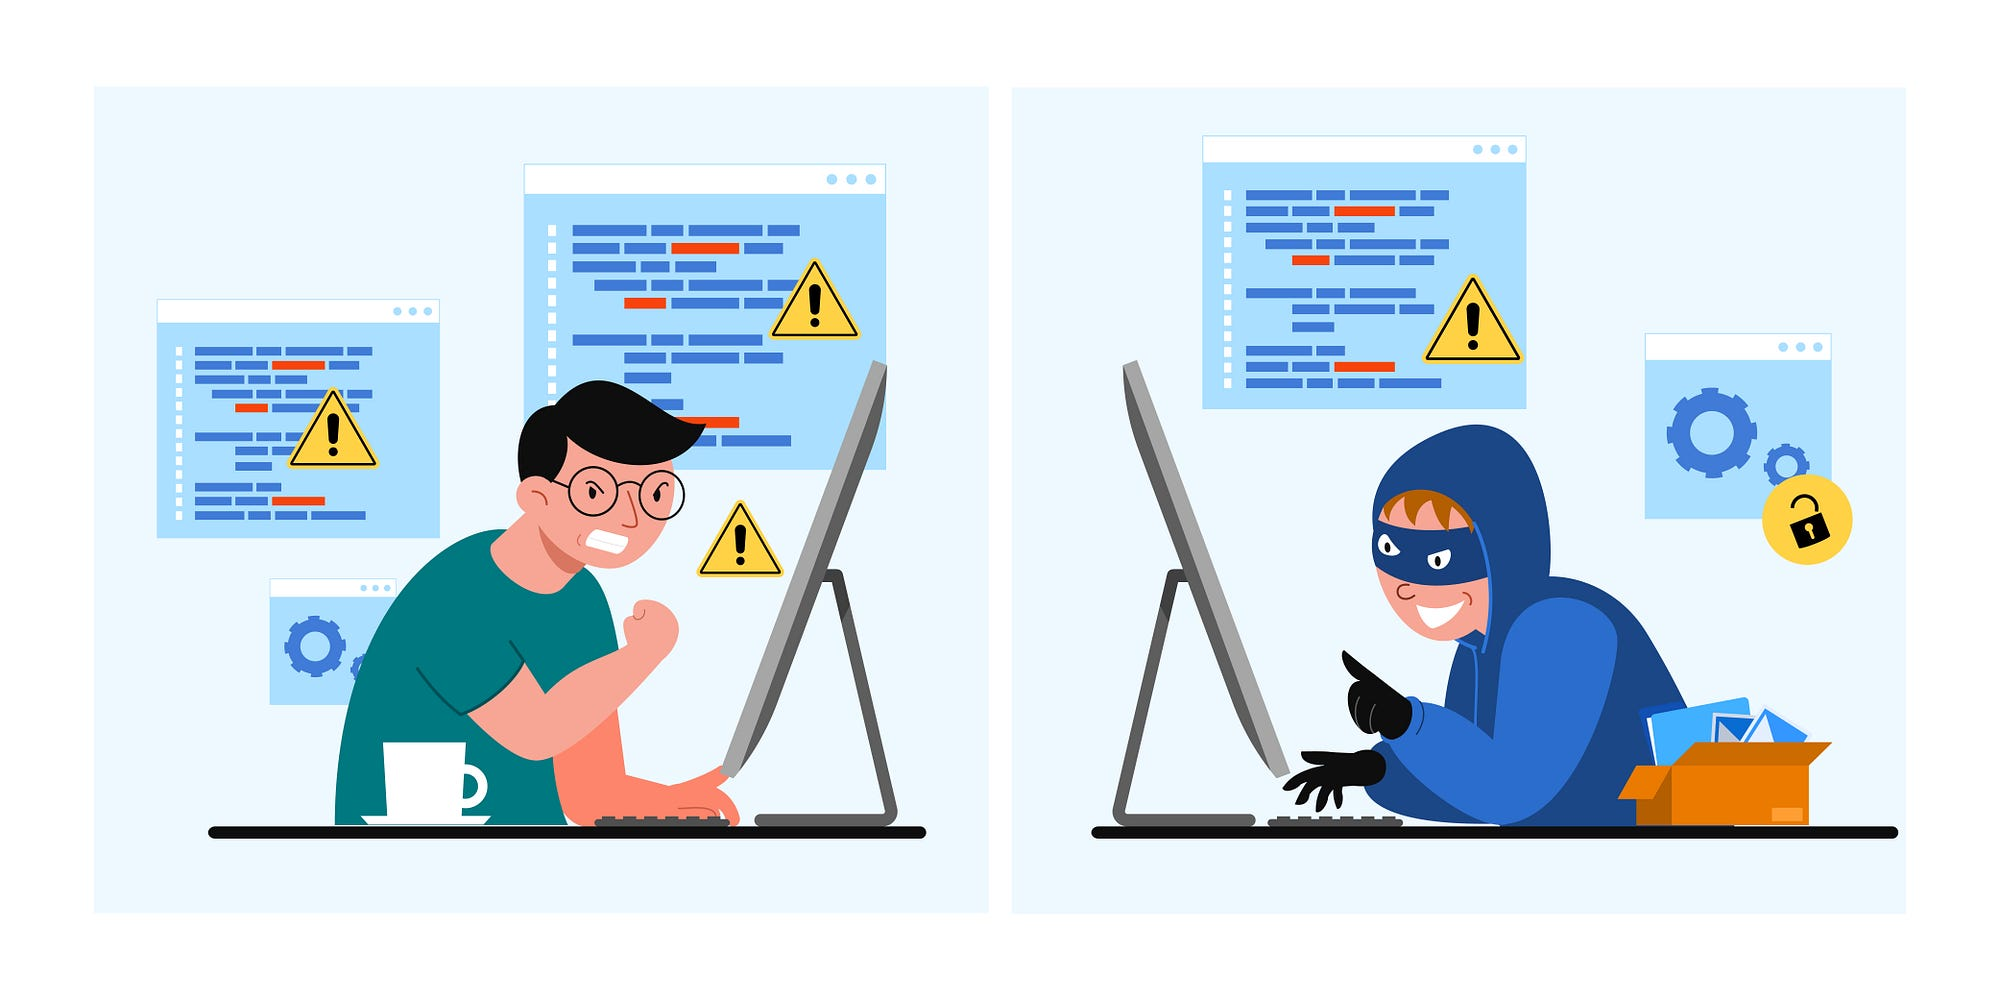

In [3]:
fraud1 = read.csv("C:/R Project/Fraudulent_E-Commerce_Transaction_Data.csv", sep=",",dec=".", header=TRUE, stringsAsFactors=TRUE)

In [4]:
head(fraud1)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058 DPO AA 05437,Unit 8934 Box 0058 DPO AA 05437,0,30,5
0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys Port Cherylview, NV 75063","634 May Keys Port Cherylview, NV 75063",0,72,8
e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790 Rothhaven, IL 15564","16282 Dana Falls Suite 790 Rothhaven, IL 15564",0,63,3
4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646 New Joshua, UT 84798","828 Strong Loaf Apt. 646 New Joshua, UT 84798",0,124,20
074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439 West Richardtown, OH 36093","29799 Jason Hills Apt. 439 West Richardtown, OH 36093",0,158,5
4e707452-7c8a-4cbd-b0c1-2aeaa35c5e88,29616b04-2d5c-4729-9c9d-8d71a6ad9dc1,166.41,2024-01-30 10:55:14,bank transfer,toys & games,2,34,Herreramouth,tablet,202.237.29.55,"5699 Brittany Villages Suite 903 Lake Tim, MD 46274","120 Kristi Dale Port Meganshire, GU 03060",0,38,10


In [5]:
fraud2 = read.csv("C:/R Project/Fraudulent_E-Commerce_Transaction_Data_2.csv", sep=",",dec=".", header=TRUE, stringsAsFactors=TRUE)

In [6]:
head(fraud2)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,"5399 Rachel Stravenue Suite 718 North Blakeburgh, IL 78600","5399 Rachel Stravenue Suite 718 North Blakeburgh, IL 78600",0,282,23
7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge Collinsbury, PR 81853","5230 Stephanie Forge Collinsbury, PR 81853",0,223,0
f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval Port Larry, IA 58422","4772 David Stravenue Apt. 447 Velasquezside, KS 67650",0,360,8
e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square West Brenda, NV 23016","7609 Cynthia Square West Brenda, NV 23016",0,325,20
7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313 Robinsonport, AS 52039","2494 Robert Ramp Suite 313 Robinsonport, AS 52039",0,116,15
5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265 APO AE 85694","PSC 3832, Box 5265 APO AE 85694",0,251,13


In [7]:
#les noms de colonnes pour les 2 dataframes
names(fraud1)
names(fraud2)

[1] "Transaction.ID"     "Customer.ID"        "Transaction.Amount"
 [4] "Transaction.Date"   "Payment.Method"     "Product.Category"  
 [7] "Quantity"           "Customer.Age"       "Customer.Location" 
[10] "Device.Used"        "IP.Address"         "Shipping.Address"  
[13] "Billing.Address"    "Is.Fraudulent"      "Account.Age.Days"  
[16] "Transaction.Hour"

[1] "Transaction.ID"     "Customer.ID"        "Transaction.Amount"
 [4] "Transaction.Date"   "Payment.Method"     "Product.Category"  
 [7] "Quantity"           "Customer.Age"       "Customer.Location" 
[10] "Device.Used"        "IP.Address"         "Shipping.Address"  
[13] "Billing.Address"    "Is.Fraudulent"      "Account.Age.Days"  
[16] "Transaction.Hour"

In [8]:
class(fraud1)

[1] "data.frame"

In [ ]:
fraud1 <- na.omit(fraud1)
dim(fraud1)

In [9]:
#la dimension des 2 dataframes
dim(fraud1)
dim(fraud2)

[1] 1472952      16

[1] 23634    16

In [10]:
#d’afficher la structure de chacune des colonnes
str(fraud1)

'data.frame':	1472952 obs. of  16 variables:
 $ Transaction.ID    : Factor w/ 1472952 levels "00000d71-ae44-44b6-ba0d-96f4435308bb",..: 124946 68521 1320638 448240 41479 451431 729836 63842 179443 363058 ...
 $ Customer.ID       : Factor w/ 1472952 levels "00000b1f-6bbc-45e6-bdf3-c98631fbf683",..: 1206104 321368 159487 203513 397206 238246 1462368 13146 1389193 982176 ...
 $ Transaction.Amount: num  58.1 390 134.2 226.2 121.5 ...
 $ Transaction.Date  : Factor w/ 1346684 levels "2024-01-01 00:00:00",..: 724699 798050 1113058 1094524 204823 424954 502457 729169 906307 229024 ...
 $ Payment.Method    : Factor w/ 4 levels "bank transfer",..: 1 3 4 1 1 1 4 2 1 1 ...
 $ Product.Category  : Factor w/ 5 levels "clothing","electronics",..: 2 2 4 1 1 5 5 3 4 3 ...
 $ Quantity          : int  1 2 2 5 2 2 2 4 4 4 ...
 $ Customer.Age      : int  17 40 22 31 51 34 14 42 38 39 ...
 $ Customer.Location : Factor w/ 99135 levels "Aaronberg","Aaronborough",..: 664 17314 6791 36745 82692 21734 72130 64974

In [11]:
#pour avoir une idée sur la distribution des différentes variables.
summary(fraud1)

                              Transaction.ID   
 00000d71-ae44-44b6-ba0d-96f4435308bb:      1  
 00003e70-3593-41ea-9d08-ffe6a546f469:      1  
 00004f68-1158-43b9-9f12-99c2f20566f7:      1  
 00005533-4c45-47ce-a287-17102b963a58:      1  
 00006c43-0082-4a6d-9e47-fe2b5487a641:      1  
 00006cc6-4a52-410d-99f5-e7b78864eb81:      1  
 (Other)                             :1472946  
                               Customer.ID      Transaction.Amount
 00000b1f-6bbc-45e6-bdf3-c98631fbf683:      1   Min.   :   10.00  
 00002f8f-08b1-4e56-a8a6-c89e195ee9a1:      1   1st Qu.:   68.61  
 0000438e-38a8-46f0-bef1-a38e9bf5c857:      1   Median :  151.76  
 000077fe-2812-442c-a79e-75bad41b5a0c:      1   Mean   :  226.77  
 00007ea2-570b-459c-ad1d-b6f3b6baf8b5:      1   3rd Qu.:  296.05  
 000083c5-5d77-4e94-9462-45e9381e7373:      1   Max.   :12701.75  
 (Other)                             :1472946                     
            Transaction.Date         Payment.Method          Product.Category 
 

<div style="color: #4169E1; font-size:30px; text-align:center;">Analyses Univariés</div>

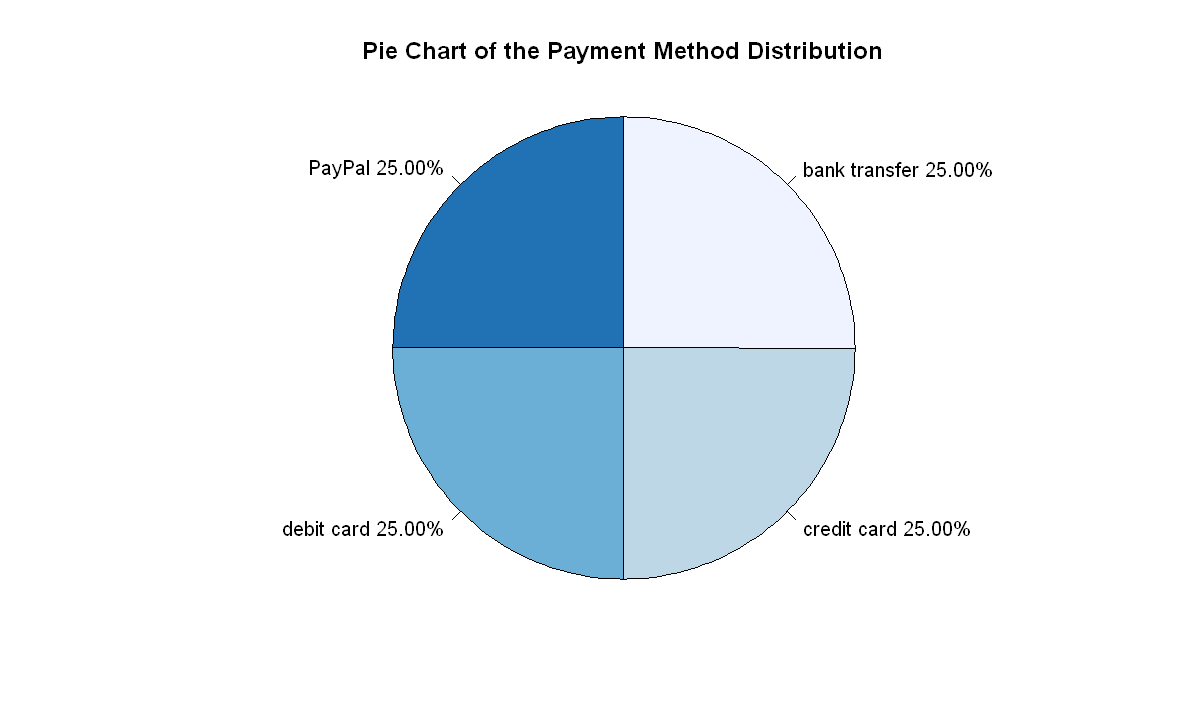

In [122]:
#calculates the frequency of each unique payment method:
r = c (table (factor(fraud1$Payment.Method)))
#calculates the percentage of each payment method relative to the total number of transactions:
prc= round(r/nrow(fraud1)*100)
prc1 <- sprintf("%.2f%%", prc)
#extracts the unique levels (payment methods) from the column:
q=(levels(fraud1$Payment.Method))
#sets the dimensions of the plot:
options(repr.plot.width = 10, repr.plot.height = 6)
blue_palette = brewer.pal(n = 4, name = "Blues")
pie(x=r, labels = paste(q ,prc1) , radius = 1,main = "Pie Chart of the Payment Method Distribution", clockwise = T, col= blue_palette )


<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The pie chart visually represents the distribution of payment methods used in the fraud1 data.<br>
    Each slice of the pie corresponds to a payment method.<br>
    The size of each slice represents the proportion of transactions associated with that payment method relative to the total number of transactions.<br>
    The labels on each slice display the payment method name along with its percentage of the total transactions.<br>
    The color palette used (shades of blue) distinguishes between different payment methods.<br>
    => With equal parts for each method ( 25% ), it suggests a uniform distribution of payment methods among the transactions.
</div>

In [127]:
# Calculateing payment count => the same method as the table() function
payment_count <- fraud1 %>% 
  group_by(`Payment.Method`) %>% 
  summarise(count = n())
head(payment_count)
pay1 <- c(table(fraud1$Payment.Method))
print(pay1)

Payment.Method,count
bank transfer,368278
credit card,368429
debit card,368277
PayPal,367968


bank transfer   credit card    debit card        PayPal 
       368278        368429        368277        367968 


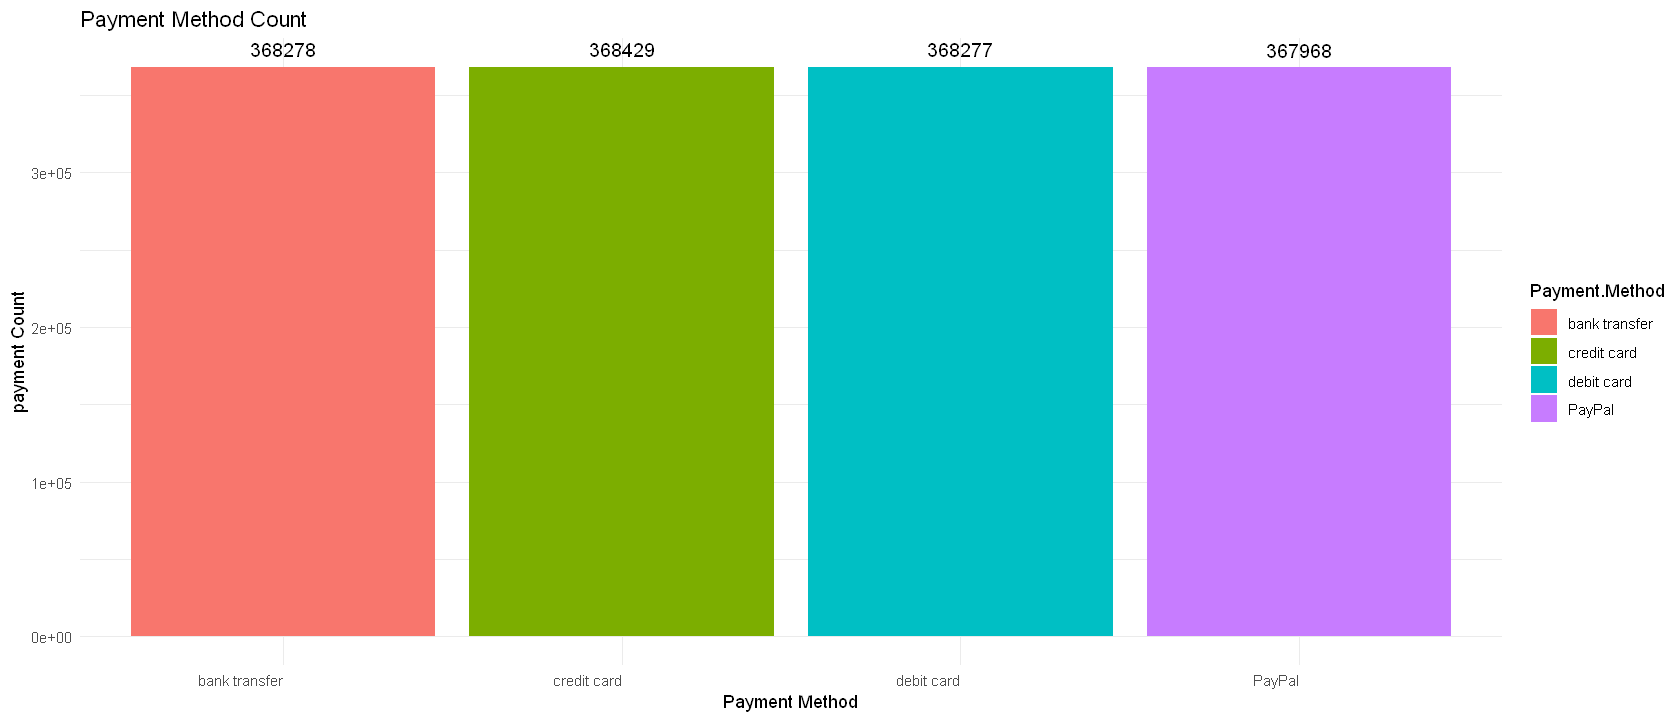

In [133]:
# sets the x-axis variable to the Payment.Method column + specifies that the fill color of the bars should be based on this Column Distribution also
bar_plot <- ggplot(fraud1, aes(x = `Payment.Method`, fill = `Payment.Method`)) +
  geom_bar() +
#calculate the count of observations for each category and use it as the label for each bar
  geom_text(stat = "count", aes(label = ..count..),
            vjust = -0.7, color = "black", size = 4) + 
#sets the overall appearance of the plot to a minimal theme
  theme_minimal() +
  theme(axis.text.x = element_text( hjust = 1)) +
  labs(x = "Payment Method", y = "payment Count", title = "Payment Method Count")
options(repr.plot.width = 14, repr.plot.height = 6)

print(bar_plot)


<div style="color: #4B0082; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 The bar plot visualizes the count of transactions for each payment method in the fraud1 data frame.
Each bar represents a payment method, and the height of the bar corresponds to the count of transactions associated with that payment method.
Text labels above each bar display the exact count of transactions for each payment method. the counts here are equal with slight difference and in the order of 3680XXXX for each Payment Method
</div>

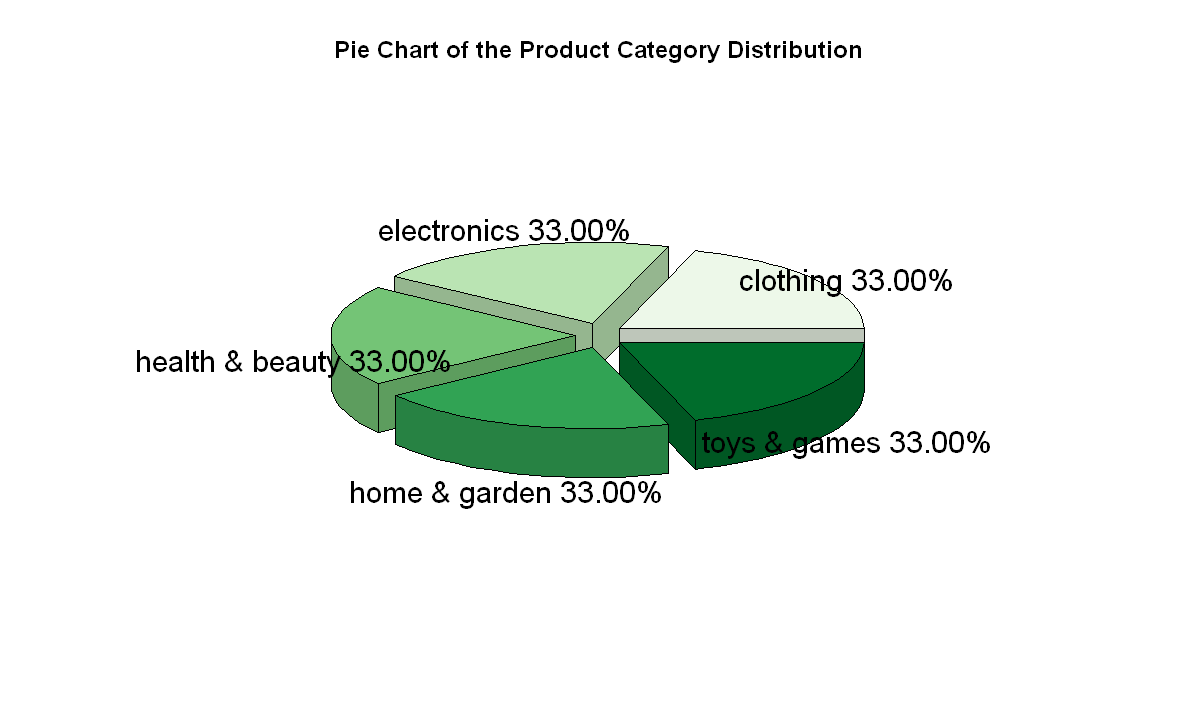

In [147]:
#calculates the frequency of each unique product category
f =  c (table(factor(fraud1$Product.Category)))
#extracts the unique levels (categories) from the Product.Category column
g = (levels(fraud1$Product.Category))
#alculates the percentage of each category relative to the total number of observations
prc3 = round(d / nrow(fraud1)*100)
prc4 <- sprintf("%.2f%%", prc3)
# Define a green color palette
green_palette <- brewer.pal(n = 5, name = "Greens")
options(repr.plot.width = 10, repr.plot.height = 6)
pie3D(f, explode= 0.1, labels = paste(g , prc4), col = green_palette, main = "Pie Chart of the Product Category Distribution")

<div style="color: #006400; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The resulting pie chart visually represents the distribution of product categories in the fraud1 dataset.
Each slice of the pie corresponds to a product category, with the size of the slice representing the proportion of transactions associated with that category => equal Distribution 
The 3D effect adds depth to the visualization, making it more engaging and visually appealing.
</div>

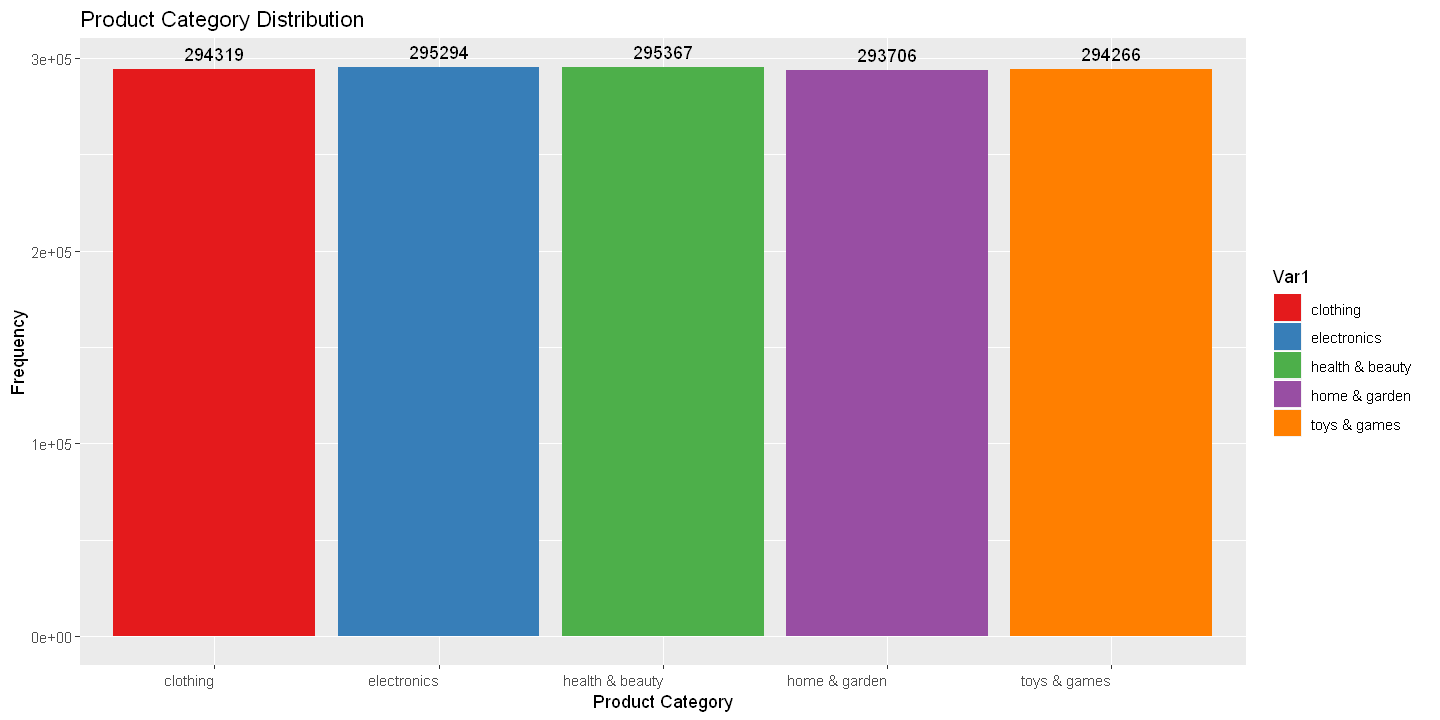

In [98]:
# Create a data frame with counts and percentages for each product category
product_counts <- as.data.frame(table(fraud1$Product.Category))
# Create a bar plot
bar_plot <- ggplot(product_counts, aes(x = Var1, y = Freq, fill = Var1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste(Freq)), vjust = -0.6) +
  labs(x = "Product Category", y = "Frequency", title = "Product Category Distribution") +
  theme(axis.text.x = element_text( hjust = 1)) +
  scale_fill_brewer(palette = "Set1") 
options(repr.plot.width = 12, repr.plot.height = 6)
# Show the plot
print(bar_plot)

<div style="color: #4B0082; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
 The bar plot represents the distribution of product categories in the dataset fraud1.
 Each bar in the plot represents a different product category. The height of each bar indicates the frequency or count of transactions associated with that particular product category.
<br>=>The counts here are equal with slight difference and in the order of 29XXXXX for each Product Category
</div>

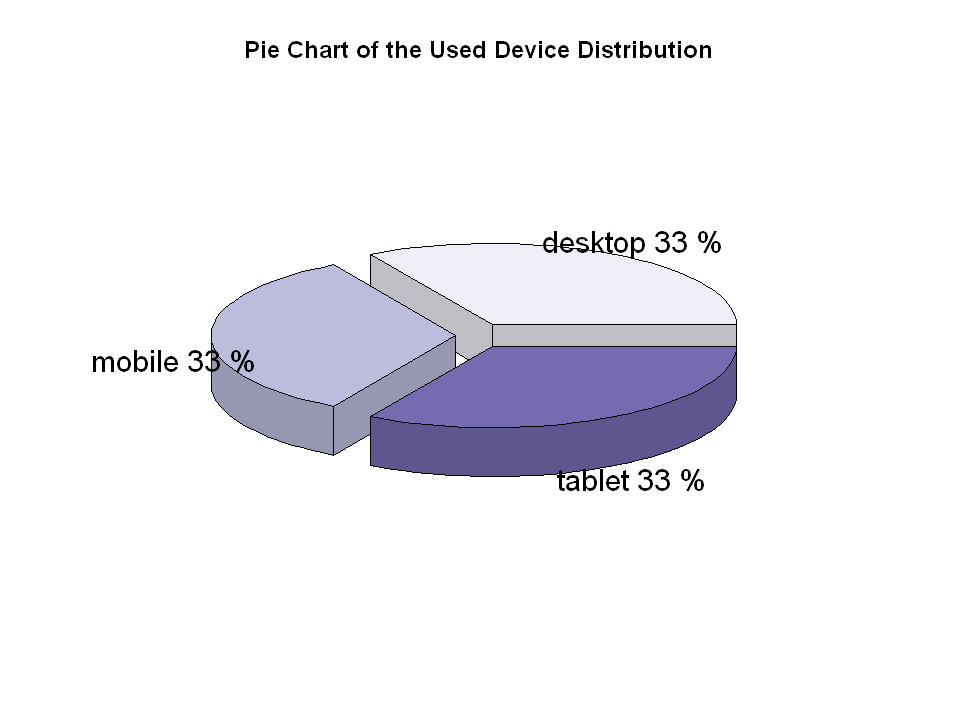

In [137]:
d =  c (table(factor(fraud1$Device.Used)))
e = (levels(fraud1$Device.Used))
prc1 = round(d / nrow(fraud1)*100)
prc2 <- sprintf("%.2f%%", prc1)
# Define a purple color palette
purple_palette <- brewer.pal(n = 3, name = "Purples")
options(repr.plot.width = 8, repr.plot.height = 6)
pie3D(d, explode= 0.1, labels = paste(e , prc1 ,"%"), col = purple_palette, main = "Pie Chart of the Used Device Distribution")

<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The pie chart visually represents the distribution of Used Devices used in the fraud1 data.<br>
    Each slice of the pie corresponds to a Device Type.<br>
    The size of each slice represents the proportion of transactions associated with that Used Device relative to the total number of transactions.<br>
    The labels on each slice display the Used Device name along with its percentage of the total transactions.<br>
    The color palette used (shades of purple) distinguishes between different Used Devices.<br>
    => With equal parts for each method ( 25% ), it suggests a uniform distribution of payment methods among the transactions.
</div>

In [18]:
fraud <- rbind(fraud1, fraud2)

In [134]:
head(fraud)
dim(fraud)

Transaction.ID,Customer.ID,Transaction.Amount,Transaction.Date,Payment.Method,Product.Category,Quantity,Customer.Age,Customer.Location,Device.Used,IP.Address,Shipping.Address,Billing.Address,Is.Fraudulent,Account.Age.Days,Transaction.Hour
15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058 DPO AA 05437,Unit 8934 Box 0058 DPO AA 05437,0,30,5
0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys Port Cherylview, NV 75063","634 May Keys Port Cherylview, NV 75063",0,72,8
e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790 Rothhaven, IL 15564","16282 Dana Falls Suite 790 Rothhaven, IL 15564",0,63,3
4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646 New Joshua, UT 84798","828 Strong Loaf Apt. 646 New Joshua, UT 84798",0,124,20
074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439 West Richardtown, OH 36093","29799 Jason Hills Apt. 439 West Richardtown, OH 36093",0,158,5
4e707452-7c8a-4cbd-b0c1-2aeaa35c5e88,29616b04-2d5c-4729-9c9d-8d71a6ad9dc1,166.41,2024-01-30 10:55:14,bank transfer,toys & games,2,34,Herreramouth,tablet,202.237.29.55,"5699 Brittany Villages Suite 903 Lake Tim, MD 46274","120 Kristi Dale Port Meganshire, GU 03060",0,38,10


[1] 1496586      16

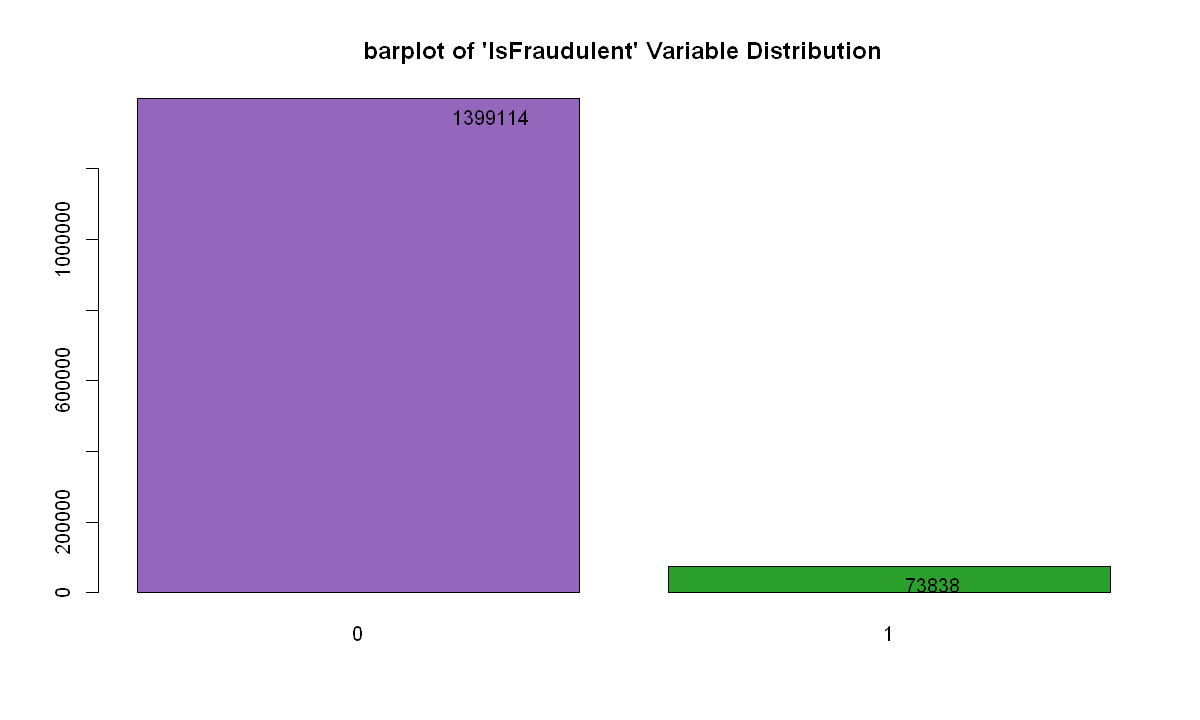

In [186]:
color_palette <- c("#9467bd", "#2ca02c") 
#calculates the frequencies of each unique value (0 and 1) 
t = c(table(fraud1$Is.Fraudulent))
options(repr.plot.width = 10, repr.plot.height = 6)
barplot(t , col=color_palette, main="barplot of 'IsFraudulent' Variable Distribution")
text(x = 1:length(t), y = t , labels = t , pos = 1, cex = 1, col = "black")

<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The resulting bar plot visually represents the distribution of the 'Is.Fraudulent' variable in the fraud1 dataset.
There are two bars in the plot, each representing one of the two unique values of the Is.Fraudulent variable (0 and 1).
The heights of the bars correspond to the frequencies of the respective values => we see that only a small count ( 73838 ) is a Fraudulent transaction .
</div>

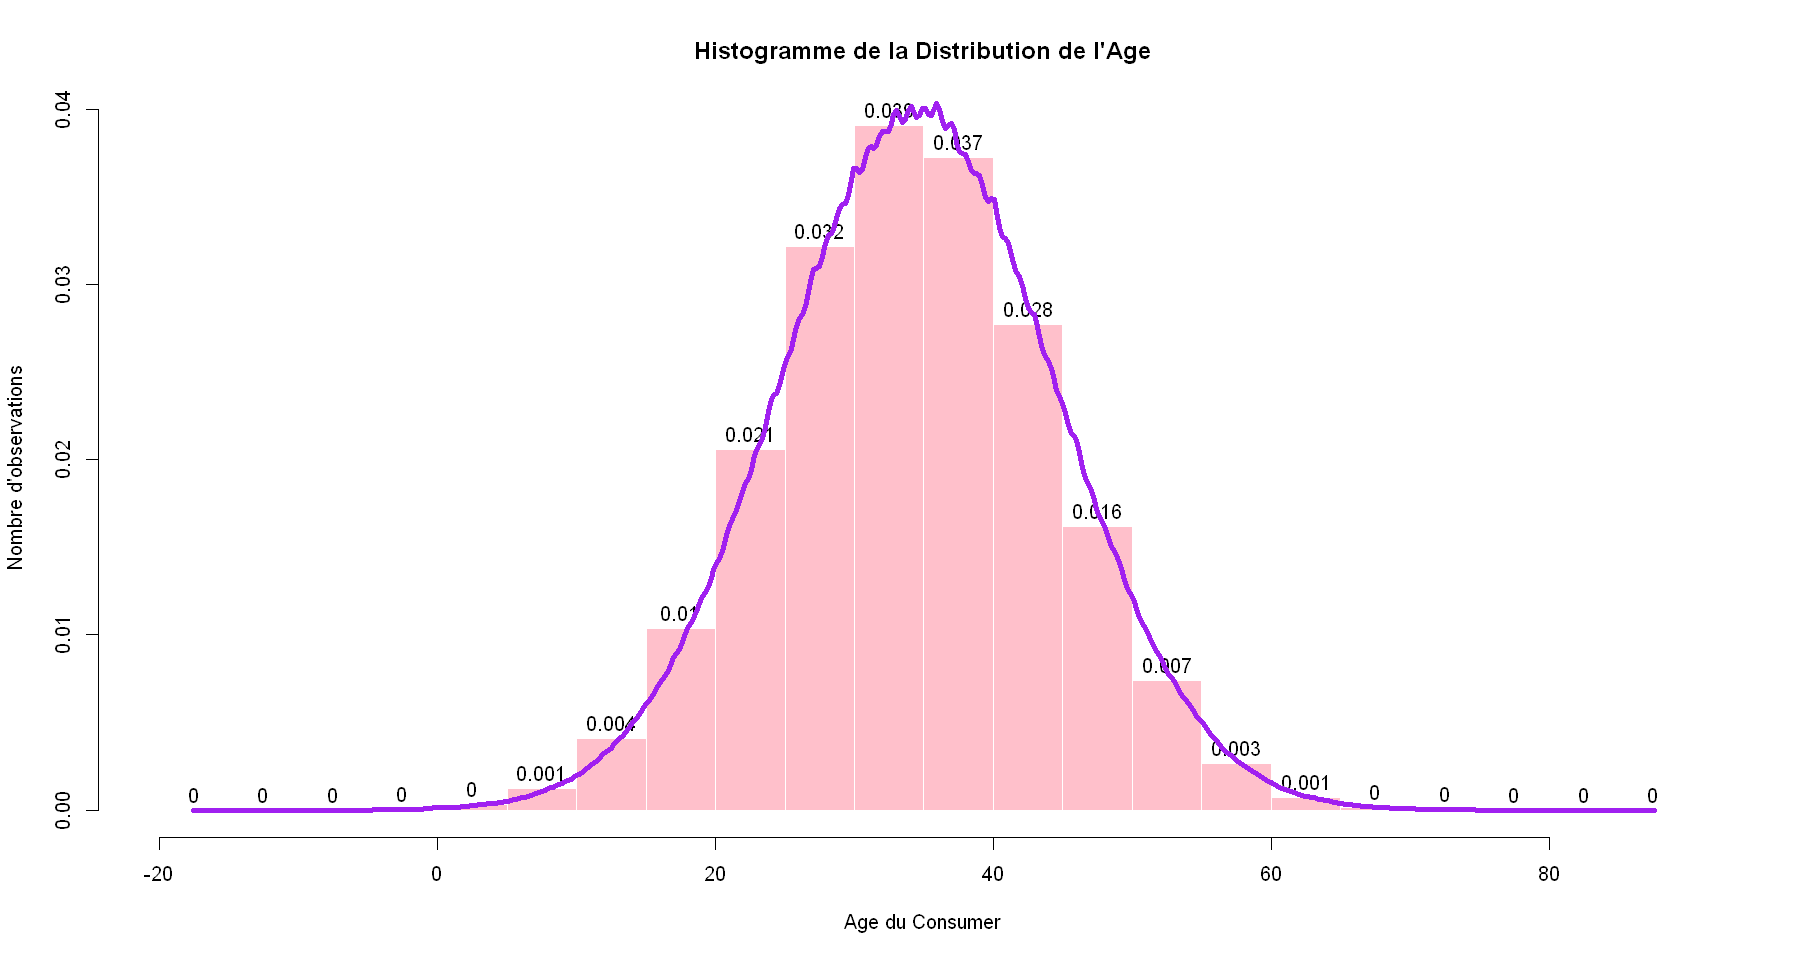

In [22]:
#Variable Continue
options(repr.plot.width = 15, repr.plot.height = 8)
hist (fraud1$Customer.Age, col= "pink", border= "white", labels=TRUE, xlab="Age du Consumer", ylab= "Nombre d'observations", main = "Histogramme de la Distribution de l'Age" , prob=TRUE)
#adds a density line to the histogram + calculates the kernel density estimate
lines(density(fraud1$Customer.Age), lwd=4, col = "purple" )


<div style="color: #9955BB; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The histogram provides a visual representation of the distribution of customer ages in the dataset.
Each bar represents a range of ages, and the height of each bar corresponds to the frequency or probability of occurrence of ages within that range.
The density line overlaid on the histogram shows the estimated probability density function of the age distribution
   => The most Important Age Category is between 25 and 40 year Olds
</div>

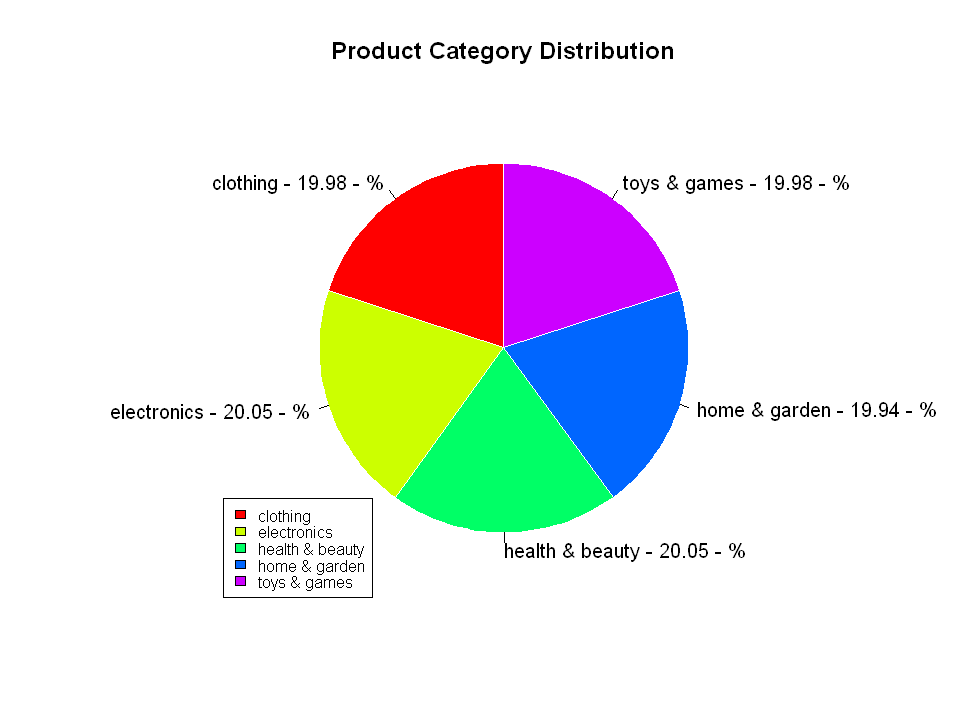

In [24]:

# Visualize the distribution of Product Categories using a donut pie chart
product_counts <- table(fraud1$Product.Category)
product_labels <- names(product_counts)
product_percentages <- round((product_counts / sum(product_counts)) * 100, 2)
product_labels_with_percentages <- paste(product_labels, product_percentages, "%", sep = " - ")

# Create a donut pie chart
pie(product_counts, labels = product_labels_with_percentages, main = "Product Category Distribution", col = rainbow(length(product_counts)), init.angle = 90, border = "white", radius = 0.8)
legend("bottomleft", product_labels, fill = rainbow(length(product_counts)), cex = 0.8)

ERROR: Error in grid.arrange(pie_plot, bar_plot, ncol = 2): could not find function "grid.arrange"


[1] 1472952      16

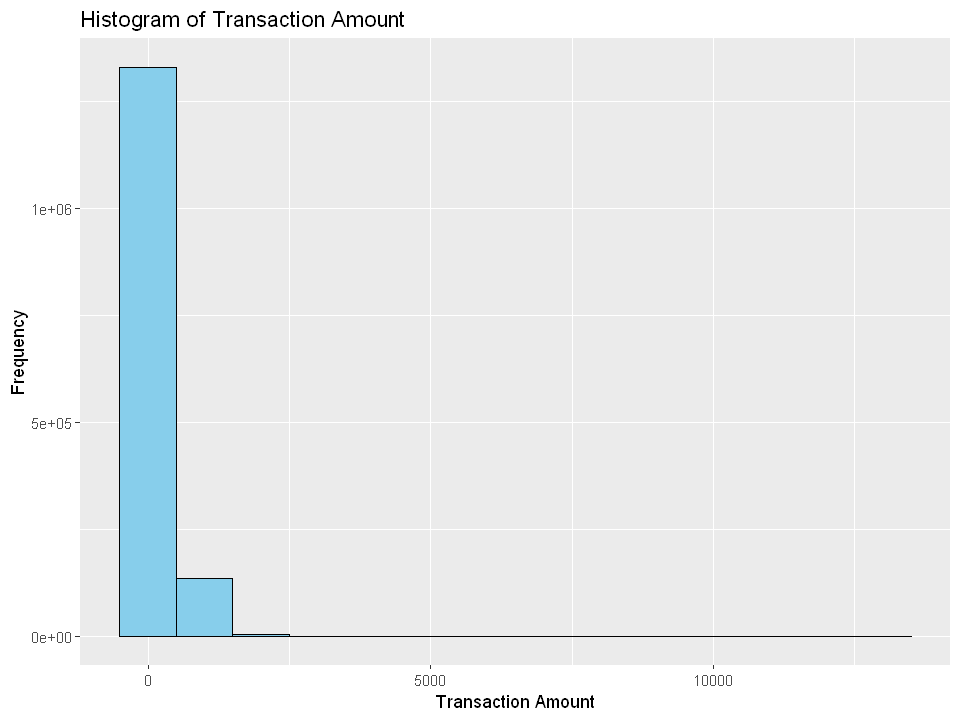

In [40]:
# Histogram of Transaction Amount
ggplot(fraud1, aes(x = Transaction.Amount)) +
  geom_histogram(binwidth = 1000, fill = "skyblue", color = "black") +
  labs(title = "Histogram of Transaction Amount", x = "Transaction Amount", y = "Frequency")

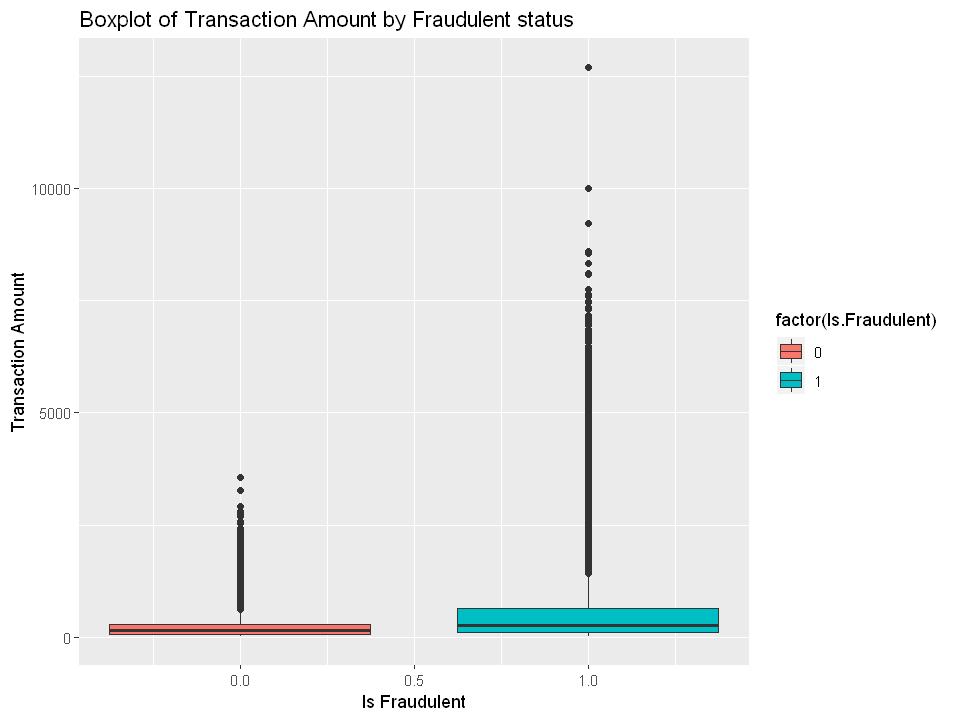

In [46]:
# Boxplot of Transaction Amount by Fraudulent status
ggplot(fraud1, aes(x = Is.Fraudulent, y = Transaction.Amount, fill = factor(Is.Fraudulent))) +
  geom_boxplot() +
  labs(title = "Boxplot of Transaction Amount by Fraudulent status", x = "Is Fraudulent", y = "Transaction Amount")
